In [8]:
import dask.array as da
import napari
import btrack
from tqdm.auto import tqdm
from skimage.io import imshow,  imsave, imread
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import itertools
import json

plt.rcParams["figure.figsize"] = (15,7)

# Reloading images

In [17]:
%%time
image = imread('/mnt/DATA/sandbox/lung_on_chip/20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_57.vsi - 001 CF405, CF488, CF561, CF638.tif')
zo1 = image[...,3]
dapi = image[...,0]
pdpn = image[...,2]
spc = image[...,1]
### labels for apical baslal wrong way round!!!!!!!!!!!!!!!!!!!!!!!!!!!
apical_mask_stack = imread('/mnt/DATA/sandbox/lung_on_chip/pp_apical_masks.tif')
basal_mask_stack = imread('/mnt/DATA/sandbox/lung_on_chip/pp_basal_masks.tif')

CPU times: user 1.12 s, sys: 1.59 s, total: 2.71 s
Wall time: 2.69 s


In [13]:
image.shape

(81, 2304, 2304, 4)

In [104]:
%%time
basal_pdpn_objects = btrack.utils.segmentation_to_objects(
    apical_mask_stack, 
    pdpn,
    properties = ('area', 'mean_intensity', 'intensity_image'), 
)

[INFO][2022/08/15 02:49:27 pm] Localizing objects from segmentation...
[INFO][2022/08/15 02:49:27 pm] Found intensity_image data
[INFO][2022/08/15 02:49:27 pm] Calculating weighted centroids using intensity_image
[INFO][2022/08/15 02:49:34 pm] Objects are of type: <class 'dict'>
[INFO][2022/08/15 02:49:34 pm] ...Found 913 objects in 79 frames.


CPU times: user 1min 37s, sys: 3.33 s, total: 1min 40s
Wall time: 6.79 s


In [20]:
apical_pdpn_objects[0]

,ID,x,y,z,t,dummy,states,label,prob,area,mean_intensity,intensity_image
0,0,62.583252,135.338683,0.0,0,False,0,5,0.0,25609,104.676793,"(267, 127) array"


In [21]:
len(apical_pdpn_objects)

913

In [22]:
apical_pdpn_objects[-1]

,ID,x,y,z,t,dummy,states,label,prob,area,mean_intensity,intensity_image
0,912,514.786479,943.583662,0.0,78,False,0,5,0.0,36975,211.262366,"(260, 201) array"


In [23]:
%%time
apical_pdpn_objects = btrack.utils.segmentation_to_objects(
    basal_mask_stack, 
    pdpn,
    properties = ('area', 'mean_intensity', 'intensity_image'), 
)

[INFO][2022/08/12 03:42:16 pm] Localizing objects from segmentation...
[INFO][2022/08/12 03:42:16 pm] Found intensity_image data
[INFO][2022/08/12 03:42:16 pm] Calculating weighted centroids using intensity_image
[INFO][2022/08/12 03:42:31 pm] Objects are of type: <class 'dict'>
[INFO][2022/08/12 03:42:32 pm] ...Found 42052 objects in 81 frames.


CPU times: user 13.6 s, sys: 1.83 s, total: 15.4 s
Wall time: 15.4 s


In [24]:
len(apical_pdpn_objects)

42052

In [ ]:
cell

In [35]:
mean_intensity = {}
for z in range(0,80):
    mean_intensities = []
    for cell in apical_pdpn_objects:
        if cell.t == z:
            mean_intensities.append(cell.properties['mean_intensity'])
    mean_intensity[z] = mean_intensities

In [36]:
mean_intensity

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [118.35029354207437,
  117.96775638154949,
  119.62583518930958,
  120.09815950920246],
 6: [119.31894736842105],
 7: [119.74756335282652,
  120.5445471349353,
  119.8187385180649,
  122.06931190356605,
  115.81118881118881,
  125.89939637826961,
  115.9458041958042,
  135.0102946396876,
  124.41864555848724,
  122.38499084807809,
  112.33333333333333,
  128.0,
  117.57456978967495,
  127.6432584269663,
  127.83333333333333,
  122.53020833333333,
  121.2292576419214,
  124.0949263502455,
  114.0,
  119.22888888888889,
  123.88111217641419,
  122.44149164166309,
  140.0,
  122.08241758241758,
  133.71599045346062],
 8: [122.09782030834663,
  121.72345483359746,
  124.5345482156416,
  124.7178729689808,
  119.02066115702479,
  122.67963683527886,
  125.02290076335878],
 9: [121.85971413446268,
  123.37334550433592,
  123.00568990042674,
  126.32130872483222,
  124.00369685767097,
  131.31506849315068,
  142.17475328947367,
  126.26554787759132,

In [48]:
import pandas as pd
import seaborn as sns

In [62]:
list_z = [i for i in mean_intensity if len(mean_intensity[i]) > 1000]

In [64]:
df_mean_int = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mean_intensity.items() ]))

/tmp/ipykernel_785621/2619982135.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_mean_int = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mean_intensity.items() ]))


In [61]:
df_mean_int[list_z]

,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,110.510736,111.935035,113.550877,112.444785,115.425220,123.720261,135.937888,356.205516,138.640947,150.134759,169.793362,193.251884,217.685561,234.288991,242.622922,241.809173,231.223147,246.387874,242.562712
1,149.848404,113.210985,115.944743,113.463415,119.975862,121.191090,122.514881,138.044919,129.009901,172.460360,206.631081,153.548201,188.301959,153.619298,137.808737,205.313595,199.559883,244.967308,291.781190
2,125.722826,122.251298,115.443598,114.932143,117.859885,118.810431,127.781910,133.816703,152.321122,406.007994,432.945965,172.698052,181.292818,131.815287,144.345659,166.240234,161.254753,190.075114,232.891740
3,124.929150,120.305936,127.639860,118.047542,121.030192,114.128936,130.533040,129.961841,160.898605,130.701195,150.484496,265.581843,335.015989,200.498901,262.089233,166.361248,137.925591,152.236752,176.797131
4,118.404082,116.791317,124.142639,111.877751,119.657444,126.153270,134.082308,139.020166,385.523573,138.366554,134.450769,303.985119,413.469020,243.358409,287.547814,334.770321,129.684677,143.267096,167.359451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.462633,NaN,346.652295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.000000,NaN,203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Mean intensity of PDPN')

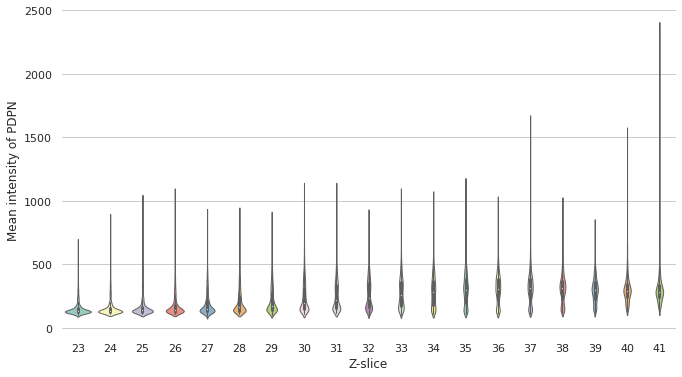

In [78]:
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# # Compute the correlation matrix and average over networks
# corr_df = df.corr().groupby(level="network").mean()
# corr_df.index = corr_df.index.astype(int)
# corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df_mean_int[list_z[:]], palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
#ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

plt.xlabel('Z-slice')
plt.ylabel('Mean intensity of PDPN')

In [89]:
subset_z = [23,  29, 32, 38, 41] 

Text(0, 0.5, 'Mean intensity of PDPN')

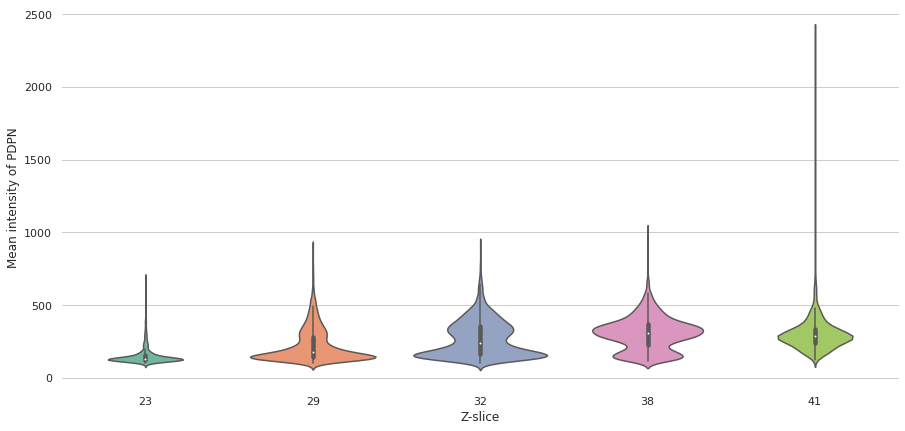

In [99]:
sns.violinplot(data=df_mean_int[subset_z], palette="Set2", split=True,
                    scale="count", #inner="stick",
                    scale_hue=False, bw=.2)
sns.despine(left=True, bottom=True)
plt.xlabel('Z-slice')
plt.ylabel('Mean intensity of PDPN')

# now for basal (which is really basal now) layer

In [106]:
mean_intensity = {}
for z in range(0,80):
    mean_intensities = []
    for cell in basal_pdpn_objects:
        if cell.t == z:
            mean_intensities.append(cell.properties['mean_intensity'])
    mean_intensity[z] = mean_intensities

In [107]:
mean_intensity

{0: [104.67679331485024],
 1: [112.15970550263442],
 2: [111.5625, 110.50886806056236],
 3: [109.5538072492273,
  108.70505427408412,
  109.25319911277938,
  112.49652685335334],
 4: [105.54178194904067],
 5: [],
 6: [],
 7: [104.4025641025641,
  104.27252475247525,
  107.37011670593392,
  105.875,
  109.63802575880392,
  115.25111205898483,
  113.27575804217331],
 8: [108.83379266482935,
  105.88427428077006,
  106.44606087735005,
  116.0547284776532,
  117.8,
  114.4,
  104.0],
 9: [109.14097478039105],
 10: [116.20933684462533],
 11: [114.11504988325197, 118.38358807698167, 117.41354300385109],
 12: [143.30769230769232,
  128.12198221092757,
  119.09742212674543,
  117.87833588647908],
 13: [109.41105961323318],
 14: [122.80103953044339],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [459.9746767959483],
 31: [],
 32: [369.3874225384439,
  315.7374996325583,
  301.4251194335438,
  629.0,
  

In [108]:
import pandas as pd
import seaborn as sns

In [116]:
list_z = [i for i in mean_intensity if len(mean_intensity[i]) > 5]

In [117]:
df_mean_int = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mean_intensity.items() ]))

/tmp/ipykernel_785621/2619982135.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_mean_int = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mean_intensity.items() ]))


In [118]:
df_mean_int[list_z]

,7,8,32,44,45,46,47,48,49,50,51,52,53,54,55,56
0,104.402564,108.833793,369.387423,203.038633,206.600396,215.232610,194.367413,228.723180,191.696607,185.785860,186.476049,260.326873,254.376167,220.138069,159.623253,151.739373
1,104.272525,105.884274,315.737500,224.363453,229.652348,212.099114,257.787713,228.754918,200.848239,204.034823,245.540929,233.661768,339.524659,159.148395,151.000000,150.260384
2,107.370117,106.446061,301.425119,201.217441,157.621577,227.801368,204.896786,210.451142,137.000000,179.239410,248.135093,148.374158,275.294267,165.807512,142.842179,258.522298
3,105.875000,116.054728,629.000000,204.036048,221.828376,171.725735,228.301705,237.177577,198.744157,203.676633,195.811208,163.409533,177.133653,132.508700,167.220630,222.660652
4,109.638026,117.800000,699.000000,228.000000,217.116957,230.387418,224.829398,199.699359,176.463517,155.172840,200.585267,346.762398,442.000000,176.574459,147.501102,227.075445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.997129,129.000000,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.184836,116.000000,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.349096,118.000000,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.000000,161.247684,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Mean intensity of PDPN (basal)')

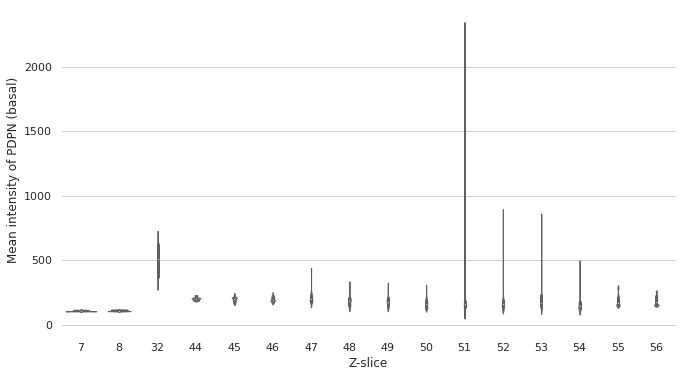

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/s

Rendering frame  1 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
IMAGEIO FFMPEG_WRITER WARNING: input image is n

Rendering frame  2 of 71


[swscaler @ 0x7487100] Warning: data is not aligned! This can lead to a speed loss
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  3 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  4 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  5 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  6 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  7 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  8 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  9 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  10 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  11 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  12 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  13 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  14 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  15 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  16 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  17 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  18 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  19 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  20 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  21 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  22 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  23 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  24 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  25 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  26 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  27 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  28 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  29 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  30 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  31 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  32 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  33 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  34 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  35 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  36 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  37 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  38 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  39 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  40 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  41 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  42 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  43 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  44 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  45 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  46 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  47 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  48 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  49 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  50 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  51 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  52 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  53 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  54 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  55 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  56 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  57 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  58 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  59 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  60 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  61 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  62 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  63 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  64 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  65 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  66 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  67 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  68 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  69 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  70 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  71 of 71


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/s

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/s

Rendering frame  1 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
IMAGEIO FFMPEG_WRITER WARNING: input image is n

Rendering frame  2 of 81


[swscaler @ 0x5c45100] Warning: data is not aligned! This can lead to a speed loss
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  3 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  4 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  5 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  6 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  7 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  8 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  9 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  10 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  11 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  12 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  13 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  14 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  15 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  16 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  17 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  18 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  19 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  20 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  21 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  22 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  23 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  24 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  25 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  26 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  27 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  28 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  29 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  30 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  31 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  32 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  33 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  34 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  35 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  36 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  37 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  38 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  39 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  40 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  41 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  42 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  43 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  44 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  45 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  46 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  47 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  48 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  49 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  50 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  51 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  52 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  53 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  54 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  55 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  56 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  57 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  58 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  59 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  60 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  61 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  62 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  63 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  64 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  65 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  66 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  67 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  68 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  69 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  70 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  71 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  72 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  73 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  74 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  75 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  76 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  77 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  78 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  79 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  80 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


Rendering frame  81 of 81


/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)
/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/numpy/core/numeric.py:2443: FutureWarning: Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  a1, a2 = asarray(a1), asarray(a2)


In [119]:
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# # Compute the correlation matrix and average over networks
# corr_df = df.corr().groupby(level="network").mean()
# corr_df.index = corr_df.index.astype(int)
# corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=df_mean_int[list_z[:]], palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
#ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

plt.xlabel('Z-slice')
plt.ylabel('Mean intensity of PDPN (basal)')

In [89]:
subset_z = [23,  29, 32, 38, 41] 

Text(0, 0.5, 'Mean intensity of PDPN')

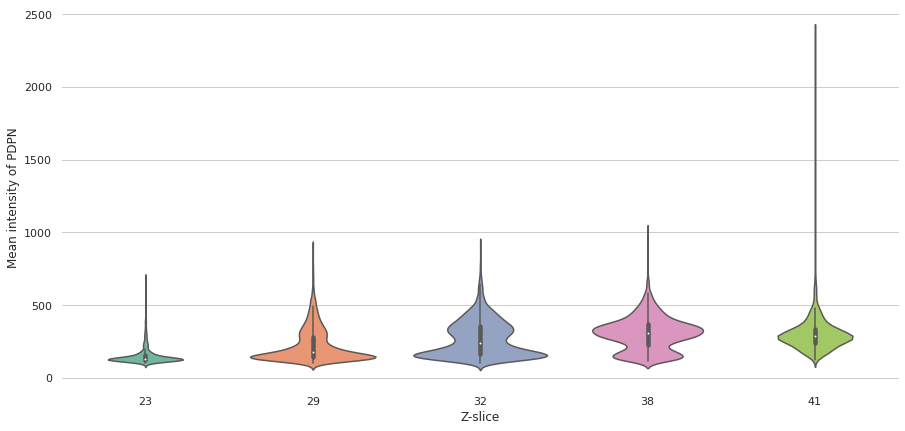

In [99]:
sns.violinplot(data=df_mean_int[subset_z], palette="Set2", split=True,
                    scale="count", #inner="stick",
                    scale_hue=False, bw=.2)
sns.despine(left=True, bottom=True)
plt.xlabel('Z-slice')
plt.ylabel('Mean intensity of PDPN')

### trying a scatter plot with multiple semantics

In [101]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df_mean_int

<AxesSubplot:xlabel='carat', ylabel='price'>

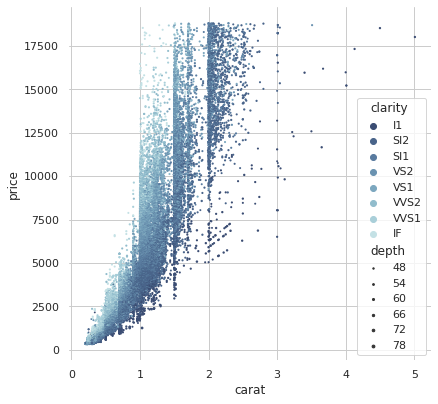

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [16]:
viewer = napari.Viewer()
viewer.add_image(dapi, colormap='blue', blending = 'additive')
viewer.add_image(zo1, colormap= 'yellow', blending = 'additive')
viewer.add_image(one, colormap='green', blending = 'additive')
viewer.add_image(two, colormap= 'red', blending = 'additive')
# viewer.add_labels(mask_stack)
viewer.add_labels(pp_basal_masks)
viewer.add_labels(pp_apical_masks)

/home/dayn/miniconda3/envs/aero/lib/python3.9/site-packages/napari_tools_menu/__init__.py:194: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Labels layer 'pp_apical_masks' at 0x7fdb8e33b640>